     block, center = (0.25,0,0)
          size (0.25,10,0)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (5.384,5.384,5.384)
     block, center = (0.375,0,0)
          size (0.25,10,0)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1.8496,1.8496,1.8496)
     block, center = (0.625,0,0)
          size (0.25,10,0)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (5.384,5.384,5.384)
     block, center = (0.875,0,0)
          size (0.25,10,0)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1.8496,1.8496,1.8496)
     block, center = (1.125,0,0)
          size (0.25,10,0)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (5.384,5.384,5.384)
     block, center = (1.375,0,0)
          size (0.25,10,0)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagon

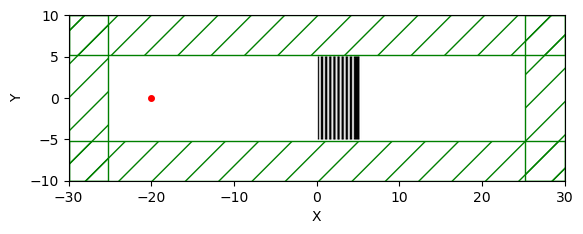

-----------
Initializing structure...
time for choose_chunkdivision = 0.000703812 s
Working in 2D dimensions.
Computational cell is 60 x 20 x 0 with resolution 32
     block, center = (0.25,0,0)
          size (0.25,10,0)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (5.384,5.384,5.384)
     block, center = (0.375,0,0)
          size (0.25,10,0)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1.8496,1.8496,1.8496)
     block, center = (0.625,0,0)
          size (0.25,10,0)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (5.384,5.384,5.384)
     block, center = (0.875,0,0)
          size (0.25,10,0)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1.8496,1.8496,1.8496)
     block, center = (1.125,0,0)
          size (0.25,10,0)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (5

FloatProgress(value=0.0, description='0% done ', max=200.0)

Meep progress: 8.0625/200.0 = 4.0% done in 4.0s, 95.2s to go
on time step 517 (time=8.07812), 0.00775127 s/step
Meep progress: 16.40625/200.0 = 8.2% done in 8.0s, 89.6s to go
on time step 1051 (time=16.4219), 0.0074993 s/step
Meep progress: 23.421875/200.0 = 11.7% done in 12.0s, 90.5s to go
on time step 1501 (time=23.4531), 0.00890633 s/step
Meep progress: 30.421875/200.0 = 15.2% done in 16.0s, 89.2s to go
on time step 1949 (time=30.4531), 0.0089312 s/step
Meep progress: 37.203125/200.0 = 18.6% done in 20.0s, 87.6s to go
on time step 2383 (time=37.2344), 0.00923806 s/step
Meep progress: 44.1875/200.0 = 22.1% done in 24.0s, 84.7s to go
on time step 2830 (time=44.2188), 0.00896442 s/step
Meep progress: 51.234375/200.0 = 25.6% done in 28.0s, 81.4s to go
on time step 3281 (time=51.2656), 0.00887917 s/step
Meep progress: 58.21875/200.0 = 29.1% done in 32.0s, 78.0s to go
on time step 3728 (time=58.25), 0.00896163 s/step
Meep progress: 65.265625/200.0 = 32.6% done in 36.0s, 74.4s to go
on tim

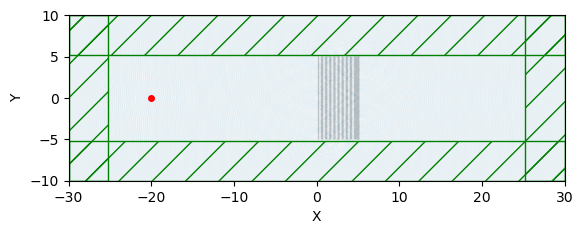

In [26]:
import meep as mp
import matplotlib.pyplot as plt
import numpy as np
a = 0.4
f=0.8
lam = a/f
d1 = (0.2/a)*lam #  normalised slab1 thickness
d2 = (0.2/a)*lam #  normalised slab2 thickness
d = d1+d2 #  normalised slab thickness
h = 10*0.4/a #  normalised slab height

eps1 = 5.384 # epsilon of the slab1
eps2 = 1.8496 # epsilon of the slab2
N = 20 # number of layers

def block(N):
    geometry = []
    for i in range(N):
        if i == 0:
            geometry.append(mp.Block(size=mp.Vector3(d/2,h), # size of the block in x and y direction
                                     center=mp.Vector3(d/2,0), # center of the block
                                     material=mp.Medium(epsilon=5.384))) # material of the block
        elif i> 0 and i < N-1:
            geometry.append(mp.Block(size=mp.Vector3(d/2,h), # size of the block in x and y direction
        # center = mp.Vector3(i+d1/2,0)if i%2 == 0 else mp.Vector3(i*d+d1/2,0), # center of the block
            center= mp.Vector3(i*d1+d2/2,0), # center of the block
            material=mp.Medium(epsilon=eps1)if i%2 == 0 else mp.Medium(epsilon=eps2))) # material of the block
        else:
            geometry.append(mp.Block(size=mp.Vector3(d,h), # size of the block in x and y direction
            center= mp.Vector3(i*d1+d2/2,0), # center of the block
            material=mp.Medium(epsilon=eps1)if i%2 == 0 else mp.Medium(epsilon=5.384))) # material of the block
    return geometry

pml_layers = [
    mp.PML(thickness=(h-d)/2, direction=mp.Y),        # PML on the y-direction (top and bottom boundaries)
    mp.PML(thickness=(h-d)/2, direction=mp.X, side=mp.Low),  # PML on the low x boundary (-2.5, 0)
    mp.PML(thickness=(h-d)/2, direction=mp.X, side=mp.High)  # PML on the high x boundary (10.5, 0)
]
cell_size = mp.Vector3(5*(N+4)*d,2*h)
# sources = mp.Source(
#     src=mp.GaussianSource(frequency=f, fwidth=0.01, width=0),  # You can also use mp.GaussianSource if desired
#     component=mp.Ez,
#     center=mp.Vector3(-N, 0)  # Center of the source
# )
f_min = a/0.9
f_max = a/0.2
def chirped_pulse(t):
    f_t = f_min +(f_max -f_min)*t
    return np.exp(1j*2*np.pi*f_t*t)
coustum_source = mp.CustomSource(
    src_func=chirped_pulse,
    start_time=0,
    end_time=100,
    center_frequency=(f_min+f_max)/2,
)
sources=[ mp.Source
         (src= coustum_source,
          component=mp.Ez,
          center=mp.Vector3(-N, 0)  # Center of the source
         )
]

sim = mp.Simulation(cell_size=cell_size,
                    geometry=block(N),
                    sources=sources,
                    boundary_layers=pml_layers,
                    resolution=32)

plt.figure()
sim.plot2D()
plt.show()
sim.run(until = 200)
plt.figure()
sim.plot2D(fields=mp.Ez)
plt.show()


In [27]:
sim.reset_meep()
f= plt.figure()
Animate = mp.Animate2D(sim, fields=mp.Ez, figsize=(10,10), cmap='viridis', vmin=-0.1, vmax=0.1)
sim.run(mp.at_every(1, Animate), until=100)
plt.close()
filename= 'Ez.mp4'
Animate.to_mp4(1,filename)

-----------
Initializing structure...
time for choose_chunkdivision = 0.000625134 s
Working in 2D dimensions.
Computational cell is 60 x 20 x 0 with resolution 32
     block, center = (0.25,0,0)
          size (0.25,10,0)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (5.384,5.384,5.384)
     block, center = (0.375,0,0)
          size (0.25,10,0)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1.8496,1.8496,1.8496)
     block, center = (0.625,0,0)
          size (0.25,10,0)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (5.384,5.384,5.384)
     block, center = (0.875,0,0)
          size (0.25,10,0)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1.8496,1.8496,1.8496)
     block, center = (1.125,0,0)
          size (0.25,10,0)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (5

/home/nfv144/miniconda3/envs/mp/lib/python3.8/site-packages/meep/visualization.py:1446: UserWarning: Warning: The 'sim' argument in Animate2D is deprecated and has no effect. It will be removed in a future release.
  warnings.warn(


time for set_epsilon = 1.5247 s
-----------


FloatProgress(value=0.0, description='0% done ')

     block, center = (0.25,0,0)
          size (0.25,10,0)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (5.384,5.384,5.384)
     block, center = (0.375,0,0)
          size (0.25,10,0)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1.8496,1.8496,1.8496)
     block, center = (0.625,0,0)
          size (0.25,10,0)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (5.384,5.384,5.384)
     block, center = (0.875,0,0)
          size (0.25,10,0)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1.8496,1.8496,1.8496)
     block, center = (1.125,0,0)
          size (0.25,10,0)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (5.384,5.384,5.384)
     block, center = (1.375,0,0)
          size (0.25,10,0)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagon

<Figure size 640x480 with 0 Axes>

-----------
Initializing structure...
time for choose_chunkdivision = 0.000628948 s
Working in 2D dimensions.
Computational cell is 60 x 20 x 0 with resolution 32
     block, center = (0.25,0,0)
          size (0.25,10,0)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (5.384,5.384,5.384)
     block, center = (0.375,0,0)
          size (0.25,10,0)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1.8496,1.8496,1.8496)
     block, center = (0.625,0,0)
          size (0.25,10,0)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (5.384,5.384,5.384)
     block, center = (0.875,0,0)
          size (0.25,10,0)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1.8496,1.8496,1.8496)
     block, center = (1.125,0,0)
          size (0.25,10,0)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (5

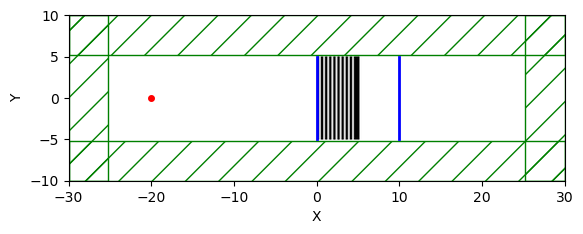

In [29]:
sim = mp.Simulation(cell_size=cell_size,
                    geometry=block(N),
                    sources=sources,
                    boundary_layers=pml_layers,
                    resolution=32)
nfreq = 100
fcen = 0.25
df=0.1
pt = mp.Vector3(N/2,0)
reflected = sim.add_flux(fcen, df, nfreq, 
    mp.FluxRegion(
    center=mp.Vector3(0,0),
    size=mp.Vector3(0,h))
    )
transmitted = sim.add_flux(fcen, df, nfreq, mp.FluxRegion(
    center=pt,
    size=mp.Vector3(0,h))
)
sim.run(until_after_sources = mp.stop_when_fields_decayed(10, mp.Ez, pt, 1e-3))
input_flux = mp.get_fluxes(transmitted)
reflected_flux = mp.get_fluxes(reflected)

plt.figure()
sim.plot2D()
plt.show()



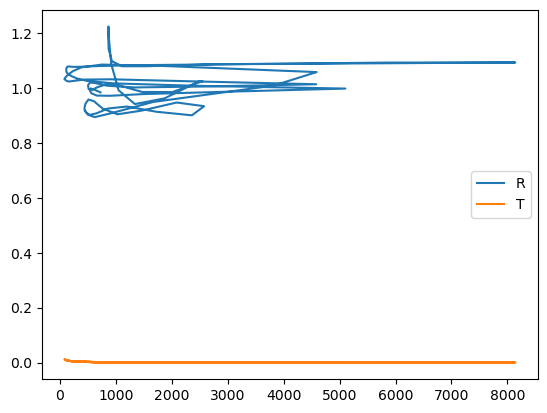

In [30]:
wl =[]
rs =[]
ts=[]
for i in range(nfreq):
    wl.append(1/input_flux[i])
    rs.append(reflected_flux[i]/input_flux[i])
    ts.append(input_flux[i])

plt.figure()
plt.plot(wl,rs)
plt.plot(wl,ts)
plt.legend(['R','T'])
plt.show()